In [34]:
#1.데이터 불러오기
#2.클러스터링 컬럼 고르기
#3.라벨 인코딩, 정규화
#4.범주형+연속형 데이터 결합 후 pca 분석

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터셋 로드
base_df = pd.read_csv('match_cgm_ppcomplete_240731.csv')

# 클러스터링 할 컬럼 지정
feature_names=[
'goldperexp', 'goldpertime', 'exppertime', 'tankpergold', 
    'dealpergold', 'damageTakenOnTeamPercentage', 'junglepertime', 'killsOnLanersEarlyJungleAsJungler', 
    'laningPhaseGoldExpAdvantage', 'killsNearEnemyTurret', 'jungleCsBefore10Minutes', 'teamDamagePercentage','visionScore']

# 클러스터링에 사용할 데이터프레임 추출
clustering_df = base_df[feature_names]

# Determine categorical columns in the dataset
#categorical_columns = clustering_df.select_dtypes(include=['object']).columns.tolist()

# Function to label encode categorical columns
#def label_encode_columns(df, columns):
#    le_df = df.copy()
#   label_encoders = {}
#    for column in columns:
#        le = LabelEncoder()
#        le_df[column] = le.fit_transform(le_df[column])
#        label_encoders[column] = le
 #   return le_df, label_encoders

# Label encode the categorical columns
#le_df, label_encoders = label_encode_columns(clustering_df, categorical_columns)

# 수치형 컬럼 추출
numeric_columns = clustering_df.select_dtypes(include=['number']).columns.tolist()

# 표준화 방식: standard scaler (평균0, 분산1)
scale_df = StandardScaler().fit_transform(clustering_df[numeric_columns])
scale_df = pd.DataFrame(scale_df, columns=numeric_columns)


# 데이터 결합
#combined_df = pd.concat(
    #[pd.DataFrame(scale_df, columns=numeric_columns), le_df[categorical_columns].reset_index(drop=True)],
   # axis=1)

# 스케일 되지 않은 수치형 컬럼 + 인코딩 컬럼
# combined_df = pd.concat(
#   [pd.DataFrame(clustering_df, columns=numeric_columns), le_df[categorical_columns].reset_index(drop=True)],
#    axis=1)

# 주성분 개수를 판단하기 위한 pca임의 시행
pca = PCA(n_components=3)
pca.fit(scale_df)

# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지
print(pca.explained_variance_ratio_.sum())

0.5993019959010968


In [35]:
# pca 시행
pca_df = pca.fit_transform(clustering_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])

# Show the first 5 firms
pca_df.head()

,PC1,PC2,PC3
0,-9.807075,-0.693731,0.780764
1,-16.234709,-7.460115,1.283840
2,-10.644241,7.772346,-1.539733
3,-4.760764,11.348797,2.429114
4,-4.929243,11.734736,-0.286336


c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: F

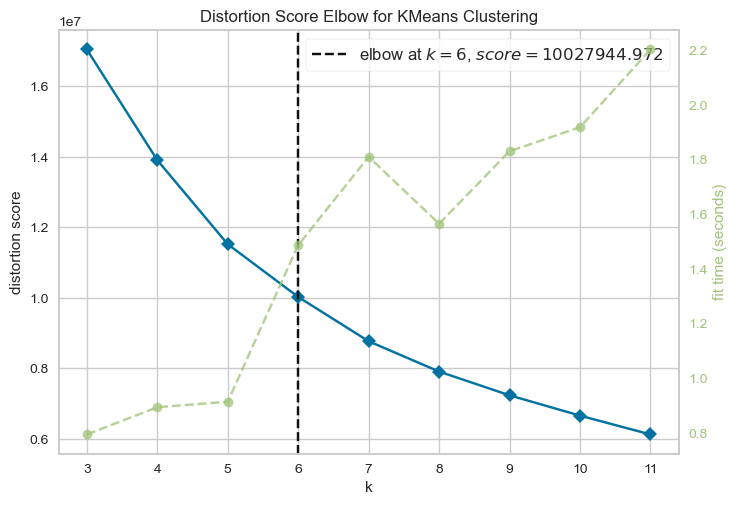

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
#옐로우박스 엘보우로 최적 k값 구하기

# Scree plot for determining the initial k value
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

# Fit the visualizer with the PCA data
visualizer.fit(pca_df)
visualizer.show()

c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


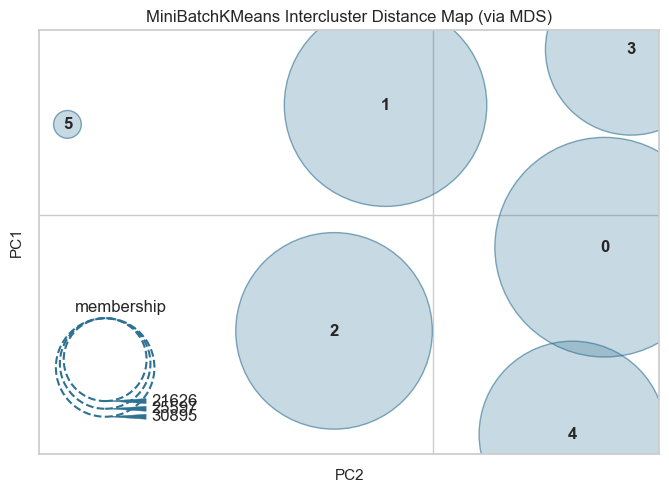

c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


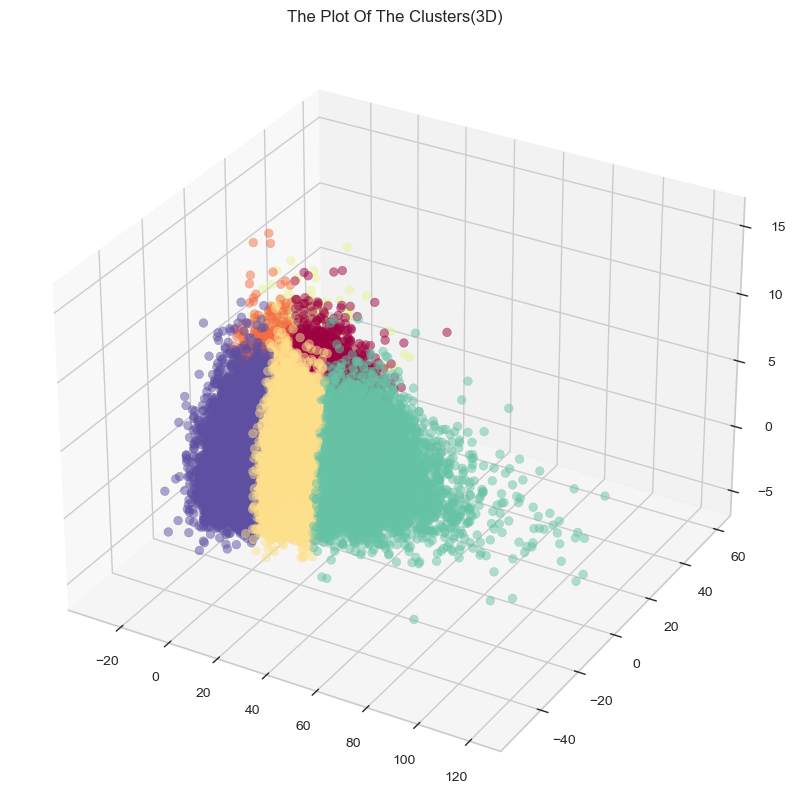

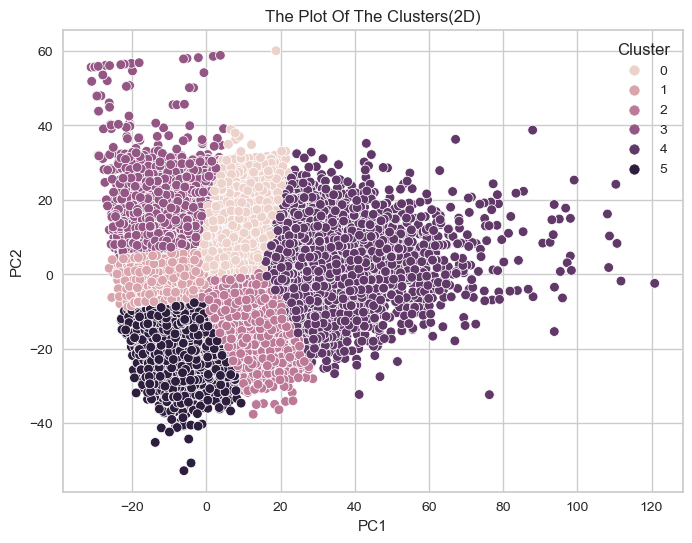

In [37]:
#클러스터링 시각화
#minibatch k
#pca 2, 3차원

intercluster_distance(MiniBatchKMeans(6, random_state=42), pca_df)

#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,
kmeans = KMeans(n_clusters=6, random_state=42,init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df

# 3차원으로 시각화
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

# 2차원으로 시각화

plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

<Figure size 1000x600 with 0 Axes>

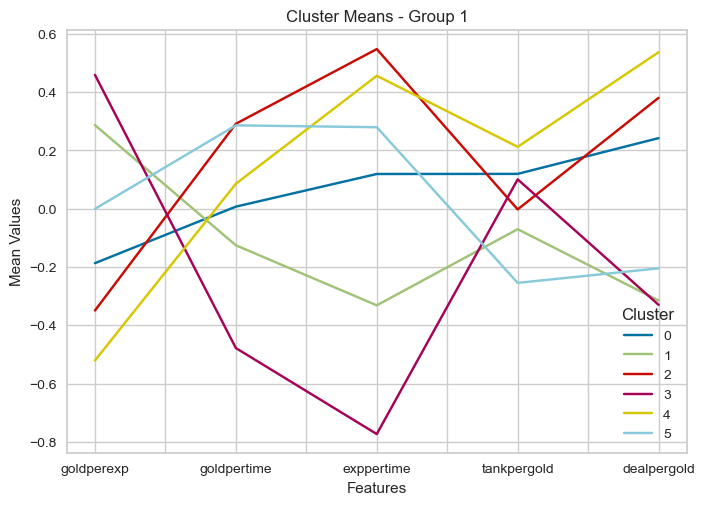

<Figure size 1000x600 with 0 Axes>

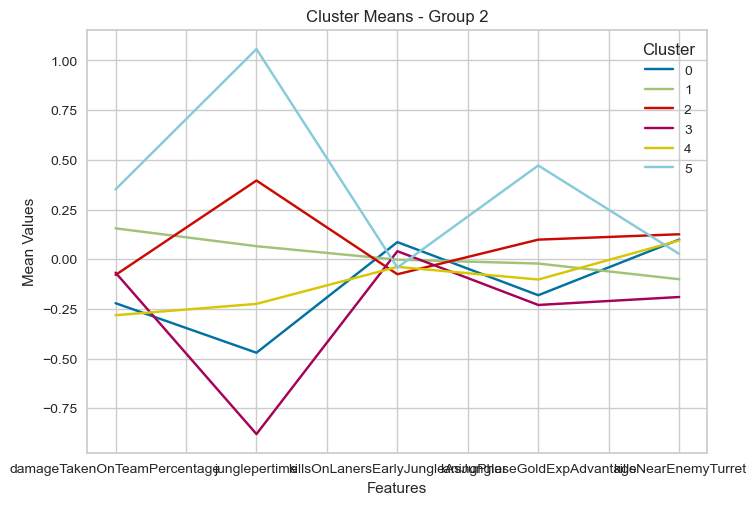

<Figure size 1000x600 with 0 Axes>

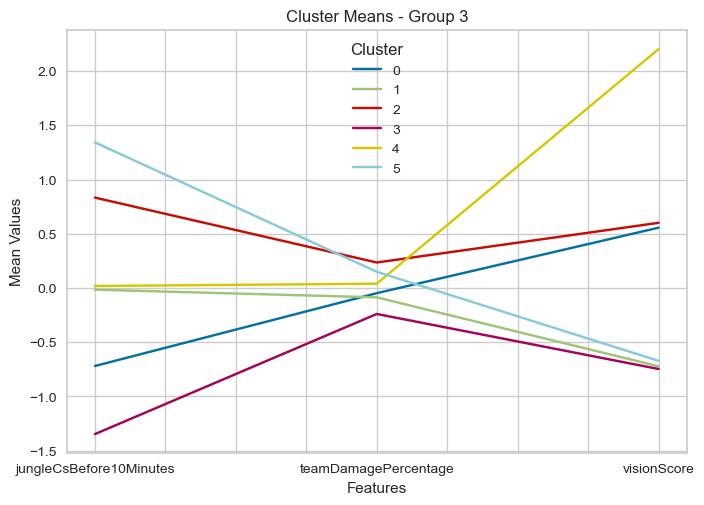

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming base_df and labels are already defined
final_df = scale_df.copy()

# Selected specific columns
feature_names=[
'goldperexp', 'goldpertime', 'exppertime', 'tankpergold', 
    'dealpergold', 'damageTakenOnTeamPercentage', 'junglepertime', 'killsOnLanersEarlyJungleAsJungler', 
    'laningPhaseGoldExpAdvantage', 'killsNearEnemyTurret', 'jungleCsBefore10Minutes', 'teamDamagePercentage','visionScore']

# Group selected columns into three sets of five columns each
column_groups = {
    'Group 1': feature_names[:5],
    'Group 2': feature_names[5:10],
    'Group 3': feature_names[10:15]
}

# Add the cluster labels
final_df2 = final_df.copy()
final_df2['cluster'] = labels.astype(str)

# Create plots for each group
for group_name, columns in column_groups.items():
    plt.figure(figsize=(10, 6))
    cluster_means = final_df2[columns + ['cluster']].groupby('cluster').mean().T
    cluster_means.plot(kind='line')
    plt.title(f"Cluster Means - {group_name}")
    plt.xlabel("Features")
    plt.ylabel("Mean Values")
    plt.legend(title="Cluster")
    plt.show()

In [40]:
# 실루엣 스코어 (시간 2~3분 걸림)

kmeans = KMeans(n_clusters = 6, random_state = 42, n_init = 10)
labels = kmeans.fit_predict(clustering_df)
silhouette_score(clustering_df, labels)

0.28222012423565307

<Figure size 1000x600 with 0 Axes>

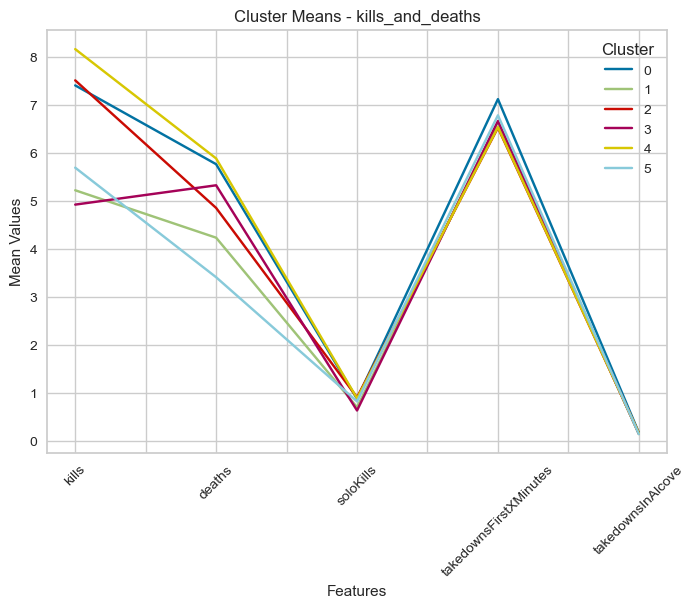

<Figure size 1000x600 with 0 Axes>

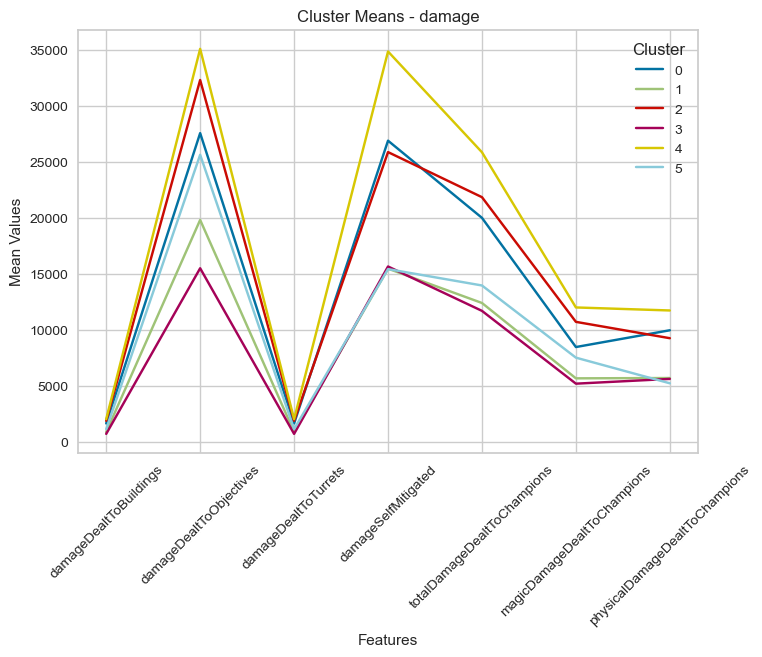

<Figure size 1000x600 with 0 Axes>

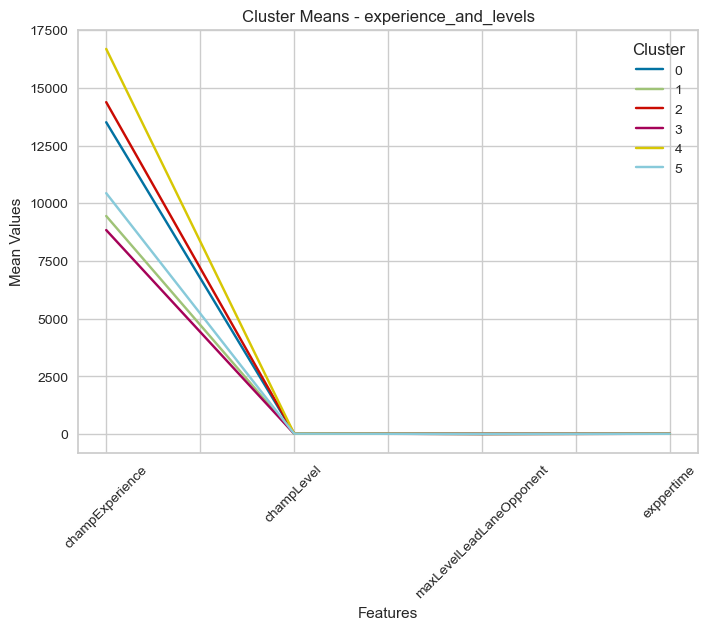

<Figure size 1000x600 with 0 Axes>

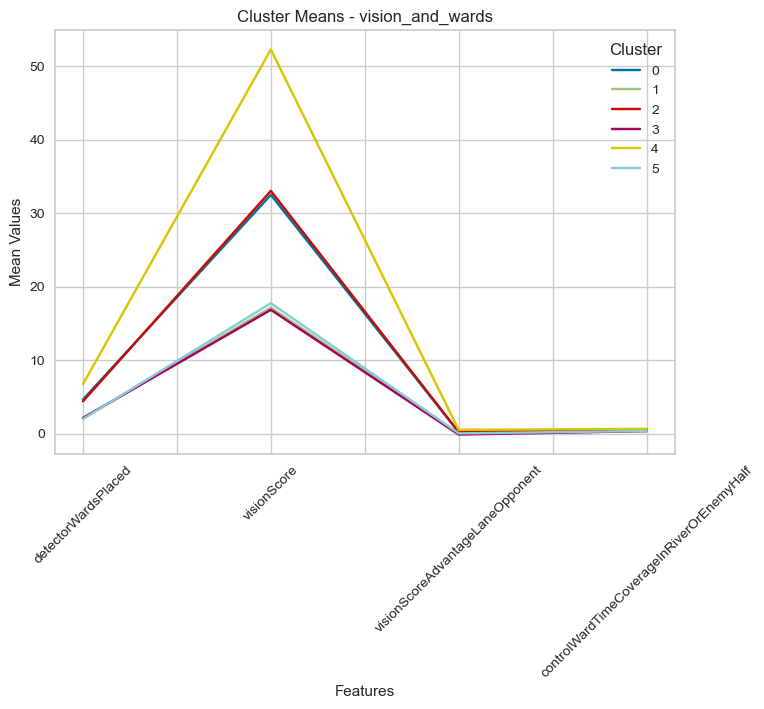

<Figure size 1000x600 with 0 Axes>

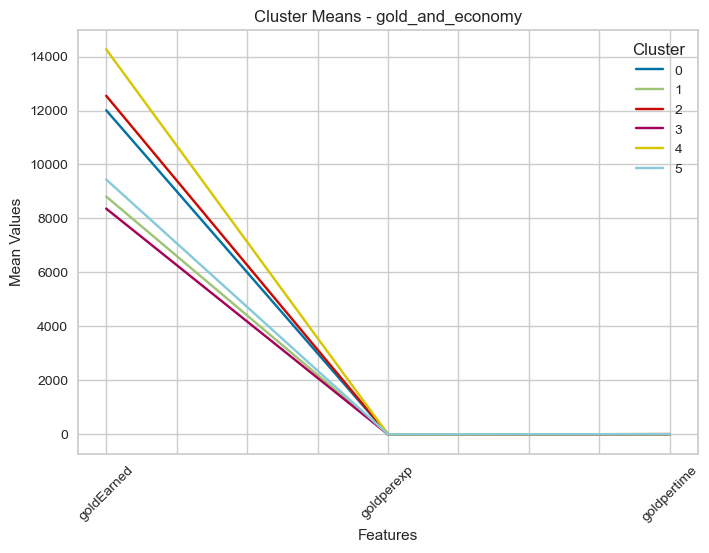

<Figure size 1000x600 with 0 Axes>

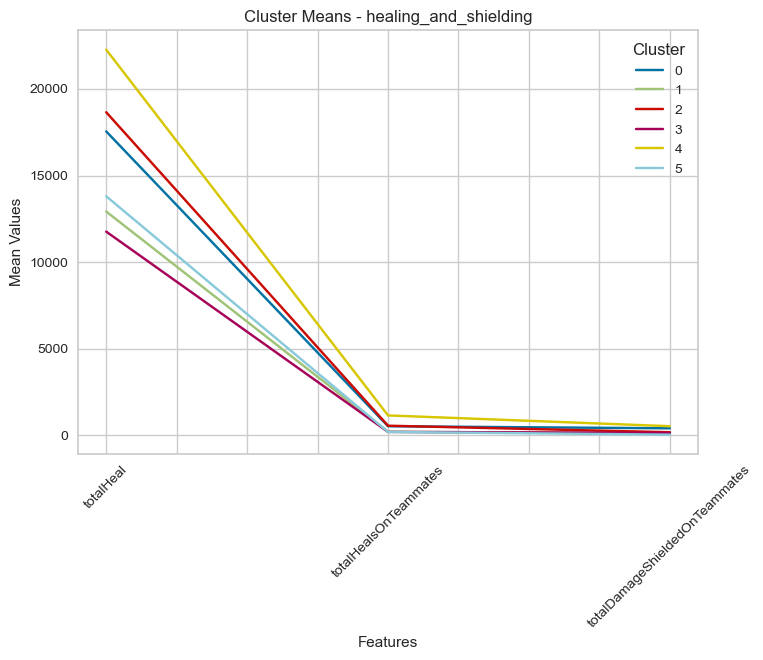

<Figure size 1000x600 with 0 Axes>

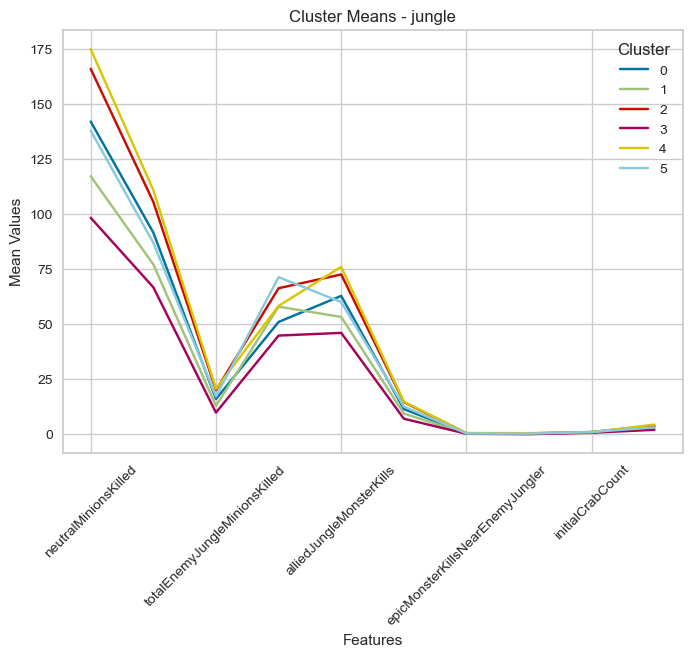

<Figure size 1000x600 with 0 Axes>

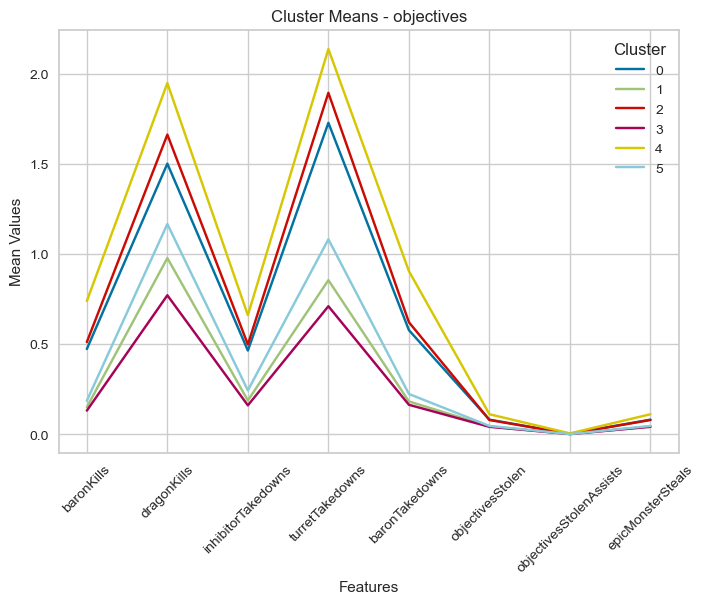

<Figure size 1000x600 with 0 Axes>

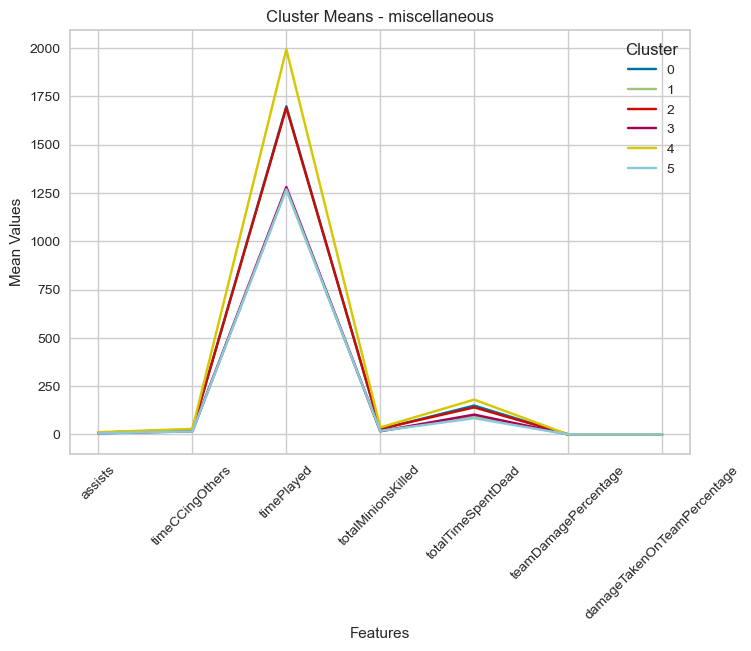

<Figure size 1000x600 with 0 Axes>

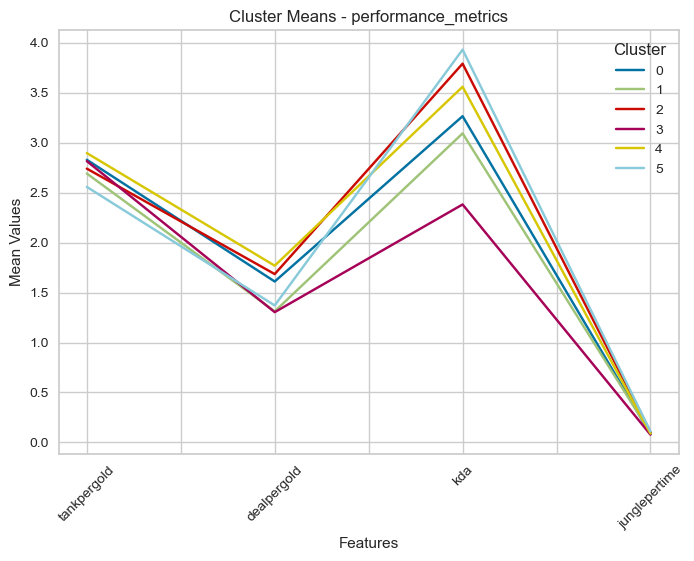

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming base_df and labels are already defined
final_df = base_df.copy()

# Define column categories
column_groups = {
    'kills_and_deaths': ['kills', 'deaths', 'soloKills', 'takedownsFirstXMinutes', 'takedownsInAlcove'],
    'damage': ['damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 
               'damageSelfMitigated', 'totalDamageDealtToChampions', 'magicDamageDealtToChampions', 
               'physicalDamageDealtToChampions'],
    'experience_and_levels': ['champExperience', 'champLevel', 'maxLevelLeadLaneOpponent', 'exppertime'],
    'vision_and_wards': ['detectorWardsPlaced', 'visionScore', 'visionScoreAdvantageLaneOpponent', 
                         'controlWardTimeCoverageInRiverOrEnemyHalf'],
    'gold_and_economy': ['goldEarned', 'goldperexp', 'goldpertime'],
    'healing_and_shielding': ['totalHeal', 'totalHealsOnTeammates', 'totalDamageShieldedOnTeammates'],
    'jungle': ['neutralMinionsKilled', 'totalAllyJungleMinionsKilled', 'totalEnemyJungleMinionsKilled', 
               'jungleCsBefore10Minutes', 'alliedJungleMonsterKills', 'enemyJungleMonsterKills', 
               'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn', 
               'initialCrabCount', 'scuttleCrabKills'],
    'objectives': ['baronKills', 'dragonKills', 'inhibitorTakedowns', 'turretTakedowns', 
                   'baronTakedowns', 'objectivesStolen', 'objectivesStolenAssists', 'epicMonsterSteals'],
    'miscellaneous': ['assists', 'timeCCingOthers', 'timePlayed', 'totalMinionsKilled', 
                      'totalTimeSpentDead', 'teamDamagePercentage', 'damageTakenOnTeamPercentage'],
    'performance_metrics': ['tankpergold', 'dealpergold', 'kda', 'junglepertime']
}

# Add the cluster labels
final_df3 = final_df.copy()
final_df3['cluster'] = labels.astype(str)

# Create plots for each group
for group_name, columns in column_groups.items():
    plt.figure(figsize=(10, 6))
    cluster_means = final_df3[columns + ['cluster']].groupby('cluster').mean().T
    cluster_means.plot(kind='line')
    plt.title(f"Cluster Means - {group_name}")
    plt.xlabel("Features")
    plt.ylabel("Mean Values")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.show()